<a href="https://colab.research.google.com/github/secons127/2024-1-my-BDA/blob/main/inclass/02w_240319_tue_dataframe_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**빅데이터분석프로그래밍**

## 파이썬 설치 확인

In [1]:
import sys
import pandas as pd
import numpy as np

print(sys.version)
print(pd.__version__)
print(np.__version__)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
1.5.3
1.25.2


## 코랩에서 한글 처리

In [2]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 18.4 MB/s eta 0:00:00


In [3]:
%config inlineBackend.firgure_format = 'retina'

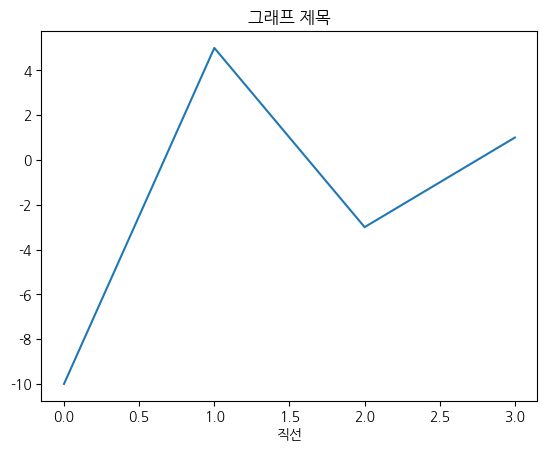

In [4]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.plot([-10,5,-3,1])
plt.title('그래프 제목')
plt.xlabel('직선')
plt.show()

In [8]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


###타이타닉 열(변수) 설명
- survived : 0 = 사망, 1 = 생존
-pclass : 1 = 1등석, 2 = 2등석, 3 = 3등석
-sex : male = 남성, female = 여성
-age : 나이
-sibsp : 타이타닉 호에 동승한 자매 / 배우자의 수
-parch : 타이타닉 호에 동승한 부모 / 자식의 수
-fare : 티켓 요금
-embarked : 탑승지, C = 셰르부르, Q = 퀸즈타운, S = 사우샘프턴
-class : First = 1등석, Second = 2등석, Third = 3등석
-who : 남/여/아이, 'man', 'woman', 'child'
-adult_male : 남자 어른, True/False
-deck : 방 위치, 'A', 'B', 'C', 'D', 'E', 'F', 'G', NaN
-embark_town : 탑승지
-alive : 생존, yes/no
-alone : 1인 탑승, True/False


<Axes: xlabel='sex', ylabel='count'>

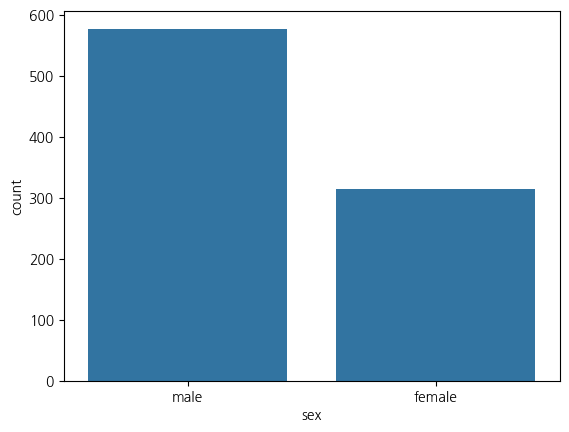

In [11]:
sns.countplot(titanic, x="sex")

<Axes: xlabel='class', ylabel='count'>

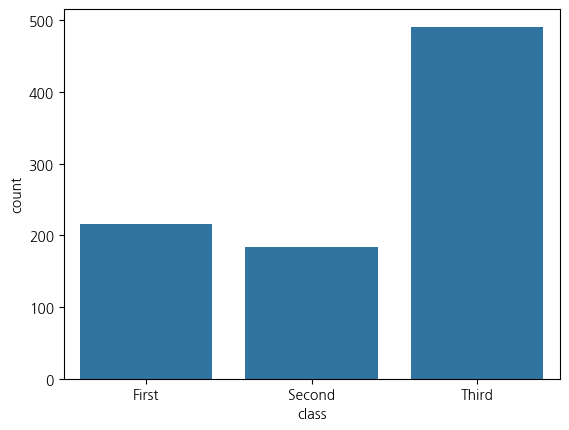

In [12]:
sns.countplot(titanic, x="class")

<Axes: xlabel='deck', ylabel='count'>

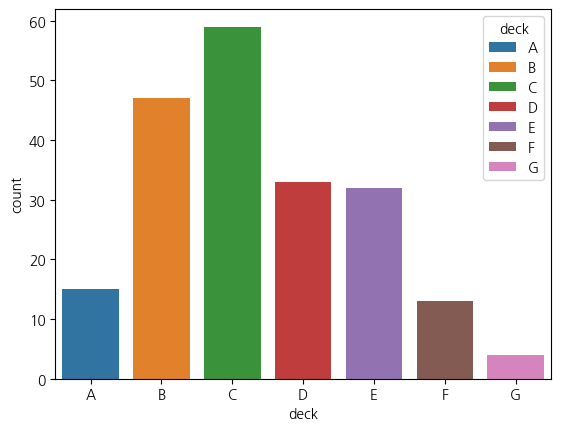

In [13]:
sns.countplot(titanic, x="deck", hue="deck")

<Axes: xlabel='class', ylabel='count'>

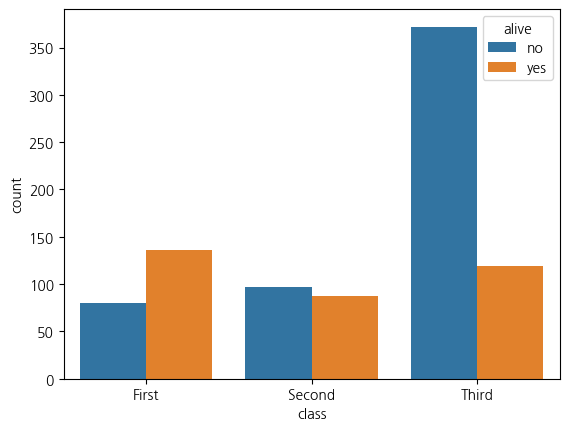

In [14]:
sns.countplot(titanic, x='class', hue='alive')

<Axes: xlabel='who', ylabel='percent'>

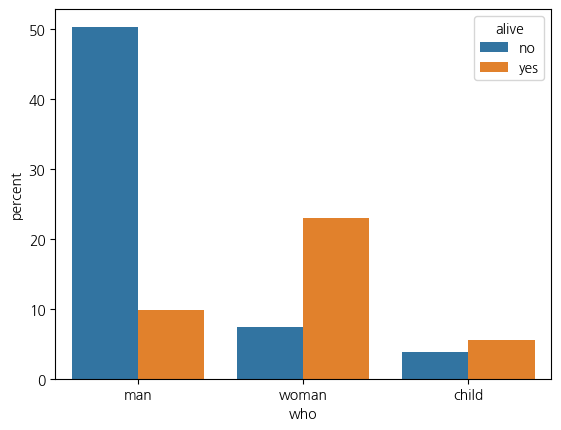

In [15]:
sns.countplot(titanic, x="who", hue="alive",stat="percent")

#열검사

In [16]:
titanic["pclass"]

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: pclass, Length: 891, dtype: int64

In [18]:
titanic.pclass

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: pclass, Length: 891, dtype: int64

In [20]:
titanic[["pclass"]]
#대괄호 두 개는 데이터프레임

,pclass
0,3
1,1
2,3
3,1
4,3
...,...
886,2
887,1
888,3
889,1


In [21]:
titanic[["pclass","alive"]]

,pclass,alive
0,3,no
1,1,yes
2,3,yes
3,1,yes
4,3,no
...,...,...
886,2,no
887,1,yes
888,3,no
889,1,yes


In [22]:
titanic.pclass.values

array([3, 1, 3, 1, 3, 3, 1, 3, 3, 2, 3, 1, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2,
       3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 3, 2, 1, 1, 3, 3, 3, 3, 3, 2, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 1, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3,
       2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 2, 3, 3, 3,
       1, 3, 3, 3, 1, 3, 3, 3, 1, 1, 2, 2, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 3, 3, 3, 2, 1, 3, 2, 3, 2, 2, 1, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 2, 2, 1, 1, 3, 1, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 2, 1, 3, 3,
       3, 1, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 3,
       3, 1, 2, 3, 3, 2, 3, 2, 3, 1, 3, 1, 3, 3, 2, 2, 3, 2, 1, 1, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 1, 3, 2, 1, 2,
       3, 2, 3, 3, 1, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 3,
       2, 3, 3, 1, 3, 2, 1, 2, 3, 3, 1, 3, 3, 3, 1, 1, 1, 2, 3, 3, 1, 1,
       3, 2, 3, 3, 1, 1, 1, 3, 2, 1, 3, 1, 3, 2, 3, 3, 3, 3, 3, 3, 1, 3,
       3, 3, 2, 3, 1, 1, 2, 3, 3, 1, 3, 1, 1, 1, 3,

In [23]:
titanic.pclass.unique()

array([3, 1, 2])

In [25]:
titanic.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [27]:
titanic.pclass.value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [28]:
titanic.pclass.value_counts().sort_index()

1    216
2    184
3    491
Name: pclass, dtype: int64

In [29]:
titanic.deck.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [ ]:
titanic.pclass.value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

## 열 별 그룹화

In [30]:
titanic.groupby('sex').count()

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
sex,,,,,,,,,,,,,,
female,314,314,261,314,314,314,312,314,314,314,97,312,314,314
male,577,577,453,577,577,577,577,577,577,577,106,577,577,577


In [31]:
titanic.groupby('who').count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,alone
who,,,,,,,,,,,,,,
child,83,83,83,83,83,83,83,83,83,83,13,83,83,83
man,537,537,537,413,537,537,537,537,537,537,99,537,537,537
woman,271,271,271,218,271,271,271,269,271,271,91,269,271,271


In [32]:
titanic.groupby('embark_town').count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alive,alone
embark_town,,,,,,,,,,,,,,
Cherbourg,168,168,168,130,168,168,168,168,168,168,168,69,168,168
Queenstown,77,77,77,28,77,77,77,77,77,77,77,4,77,77
Southampton,644,644,644,554,644,644,644,644,644,644,644,128,644,644


In [33]:
titanic.groupby('pclass')["fare"].mean()

pclass
1    84.154687
2    20.662183
3    13.675550
Name: fare, dtype: float64

#막대그래프

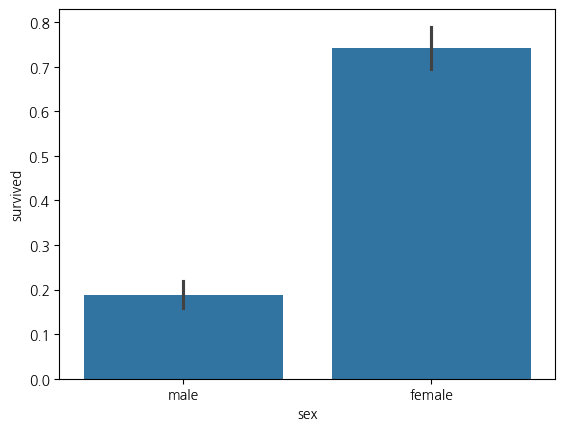

In [35]:
sns.barplot(titanic, x="sex", y="survived"); #높이:평균

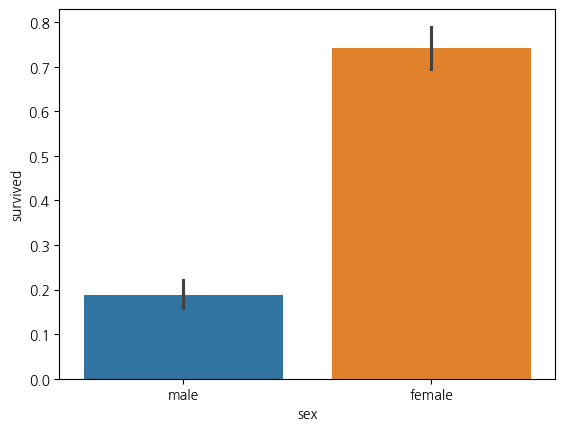

In [36]:
sns.barplot(titanic, x="sex", y="survived",hue="sex");

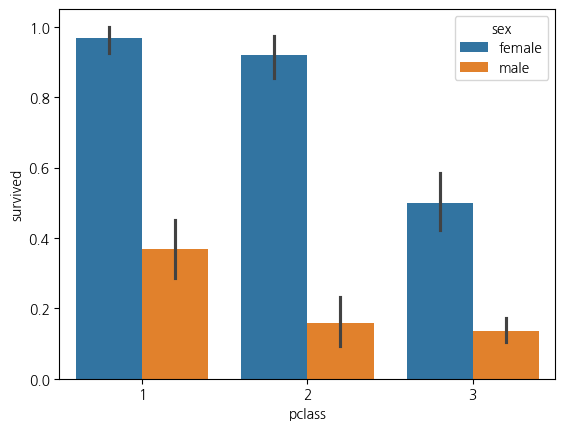

In [37]:
sns.barplot(titanic, x="pclass", y="survived",hue="sex");

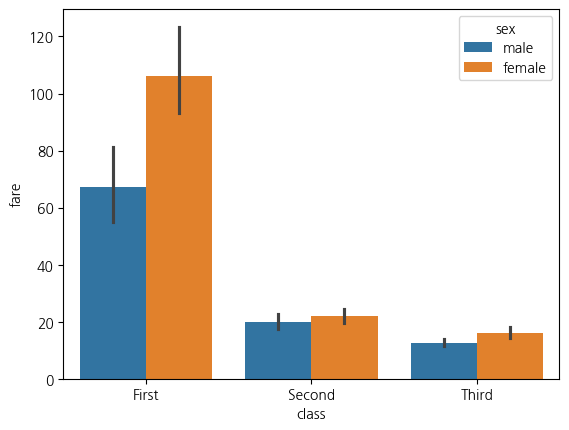

In [38]:
sns.barplot(titanic, x="class", y="fare",hue="sex");

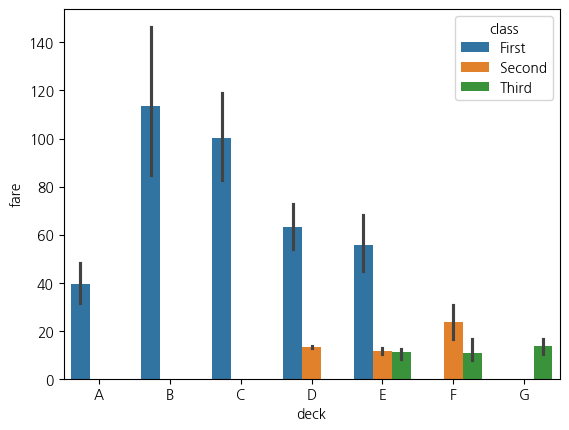

In [39]:
sns.barplot(titanic, x="deck", y="fare",hue="class");

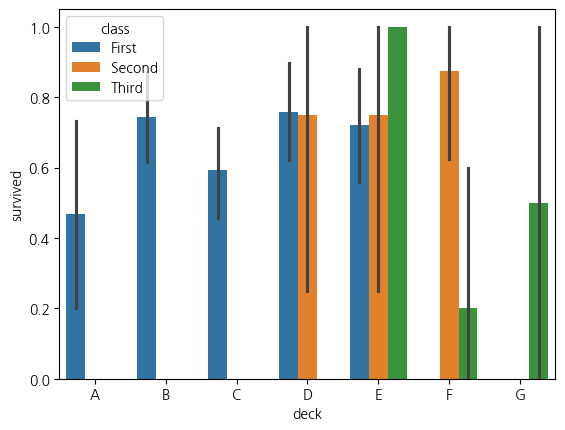

In [40]:
sns.barplot(titanic, x="deck", y="survived",hue="class");

# 단원 4 데이터프레임의 세계로!

In [46]:
import pandas as pd

df = pd.DataFrame({"name    ": ["김지훈", "이유진", "박동현", "김민지"],
                   "english" : [90, 80, 60, 70],
                   "math"    : [50, 60, 100, 20]})
df

,name,english,math
0,김지훈,90,50
1,이유진,80,60
2,박동현,60,100
3,김민지,70,20


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      4 non-null      object
 1   english   4 non-null      int64 
 2   math      4 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 224.0+ bytes


In [44]:
df.describe()

,english,math
count,4.000000,4.000000
mean,75.000000,57.500000
std,12.909944,33.040379
min,60.000000,20.000000
25%,67.500000,42.500000
50%,75.000000,55.000000
75%,82.500000,70.000000
max,90.000000,100.000000


In [45]:
df.describe(include="all")

,name,english,math
count,4,4.000000,4.000000
unique,4,NaN,NaN
top,김지훈,NaN,NaN
freq,1,NaN,NaN
mean,NaN,75.000000,57.500000
std,NaN,12.909944,33.040379
min,NaN,60.000000,20.000000
25%,NaN,67.500000,42.500000
50%,NaN,75.000000,55.000000
75%,NaN,82.500000,70.000000


#특정 변수의 값 추출하기

In [47]:
df["math"]

0     50
1     60
2    100
3     20
Name: math, dtype: int64

In [48]:
sum(df["math"])

230

In [49]:
sum(df["english"])

300

In [51]:
df["math"].sum()

230

In [53]:
df["english"].sum()

300

In [55]:
df["math"].mean()

57.5

In [54]:
sum(df["math"]) / len(df)

57.5

In [56]:
sum(df["english"]) / len(df)

75.0

In [58]:
df["english"].mean()

75.0

In [59]:
df.english.mean()

75.0

In [60]:
df.sum()

name        김지훈이유진박동현김민지
english              300
math                 230
dtype: object

In [61]:
df.sum(axis=0)

name        김지훈이유진박동현김민지
english              300
math                 230
dtype: object

In [63]:
df.sum(axis=0, numeric_only=True)

english    300
math       230
dtype: int64

In [65]:
df.sum(axis=1, numeric_only=True)

0    140
1    140
2    160
3     90
dtype: int64

In [66]:
df.sum(axis=1) # 가급적 numeric_only = True 쓰기

<ipython-input-66-f6cc363c055e>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.sum(axis=1)


0    140
1    140
2    160
3     90
dtype: int64

In [68]:
df.sum(axis='index', numeric_only=True)

english    300
math       230
dtype: int64

In [69]:
df.sum(axis=1, numeric_only=True)

0    140
1    140
2    160
3     90
dtype: int64

In [70]:
df.sum(axis='columns', numeric_only=True)

0    140
1    140
2    160
3     90
dtype: int64

In [71]:
df.mean(axis=1, numeric_only=True)

0    70.0
1    70.0
2    80.0
3    45.0
dtype: float64

In [72]:
df.sum(axis=0, numeric_only=True)

english    300
math       230
dtype: int64

## 4-3 외부 데이터 이용하기 - 축적된 시험 성적 데이터를 불러오자!

파일 탐색기 -  C 드라이드 - 새 파일 생성 ( 2024-1-BDA) -> 파일 내부에 github 파일 생성 - git bash 열어서

 -git clone  !강환수 교수님 깃허브 링크 ( shift+insert)

In [73]:
df_exam = pd.read_excel('excel_exam.xlsx') #엑셀 파일을 불러와 df_exam에 할당
df_exam                                    #출력

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [74]:
sum(df_exam['english']) / len(df_exam)

84.9

In [76]:
df_exam['english'].mean()

84.9

In [77]:
df_exam.english.mean()

84.9

In [84]:
# 과학 성적 평균
print(sum(df_exam['science']) / 20)
print(sum(df_exam['science']) / len(df_exam))
print(df_exam['science'].mean())

59.45
59.45
59.45


#엑셀 파일의 첫 번째 행이 변수명이 아니라면?

In [90]:
df_exam_novar = pd.read_excel('excel_exam_novar.xlsx')
df_exam_novar

,1,1.1,50,98,50.1
0,2,1,60,97,60
1,3,2,25,80,65
2,4,2,50,89,98
3,5,3,20,98,15
4,6,3,50,98,45
5,7,4,46,98,65
6,8,4,48,87,12


In [91]:
df_exam_novar = pd.read_excel('excel_exam_novar.xlsx', header = None)
df_exam_novar

,0,1,2,3,4
0,1,1,50,98,50
1,2,1,60,97,60
2,3,2,25,80,65
3,4,2,50,89,98
4,5,3,20,98,15
5,6,3,50,98,45
6,7,4,46,98,65
7,8,4,48,87,12


# 엑셀에 시트가 여러 개 있다면?

In [86]:
# Sheet2 시트의 데이터 불러오기
df_exam = pd.read_excel('excel_exam.xlsx', sheet_name = 'Sheet2')
df_exam.head()

,id,nclass,math,english,science
0,1,1,100,100,98
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [88]:
# 세 번째 시트의 데이터 불러오기
df_exam = pd.read_excel('excel_exam.xlsx', sheet_name = 2)
df_exam.head()

,id,nclass,math,english,science
0,1,1,100,100,98
1,2,1,90,90,90
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [87]:
df_exam.tail()

,id,nclass,math,english,science
15,16,4,58,98,65
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87
19,20,5,78,83,58


# csv 파일 불러오기

In [89]:
df_csv_exam = pd.read_csv('exam.csv')
df_csv_exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [92]:
df_csv_exam.to_csv("output_newdata.csv")

In [93]:
df_csv_exam.to_csv('output_newdata_noindex.csv', index = False)

#정리하기

In [94]:
# 1. 데이터 프레임 만들기
df = pd.DataFrame({'name'    : ['김지훈', '이유진', '박동현', '김민지'],
                   'english' : [90, 80, 60, 70],
                   'math'    : [50, 60, 100, 20]})


# 2.외부 데이터 이용하기

# 엑셀 파일 불러오기
df_exam = pd.read_excel('excel_exam.xlsx')

# CSV 파일 불러오기
df_csv_exam = pd.read_csv('exam.csv')

# CSV 파일로 저장하기
df_midterm = pd.DataFrame({'english' : [90, 80, 60, 70],
                           'math'    : [50, 60, 100, 20],
                           'nclass'  : [1, 1, 2, 2]})
df_midterm.to_csv('output_newdata2.csv')
df_midterm.to_csv('output_newdata3.csv', index = False)